In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# K-Means
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

# Mean Shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Spectral Clustering
from sklearn.cluster import SpectralClustering

# Affinity Propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

# General 
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Blob 1 - Far Apart High SD

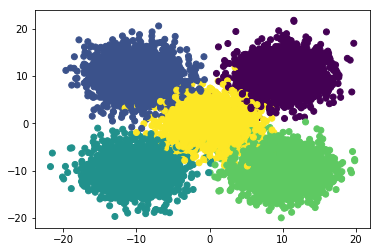

In [7]:
# Specify centers
centers = [[10, 10], [-10, 10], [-10, -10], [10, -10], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=3,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

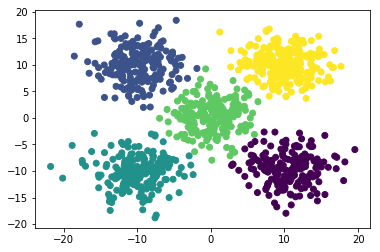

K-Means Results:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  185    3
1        0  201    0    0    2
2        0    0  190    0    1
3        3    2    1    2  191
4      218    0    0    0    1


In [11]:
################## K-Means ###########################
from sklearn.cluster import KMeans

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means Results:')
print(pd.crosstab(Y_, y_train))

In [22]:
####################### Mean Shift ####################
# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  1


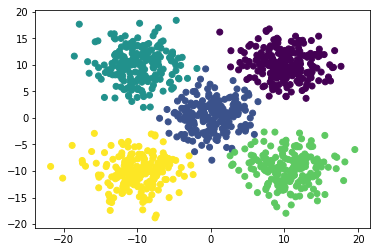

Mean Shift Results:
col_0    0    1    2    3    4
row_0                         
0      218    0    0    0    1
1        3    2    1    2  189
2        0  201    0    0    2
3        0    0    0  185    5
4        0    0  190    0    1


In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift Results:')
print(pd.crosstab(labels, y_train))

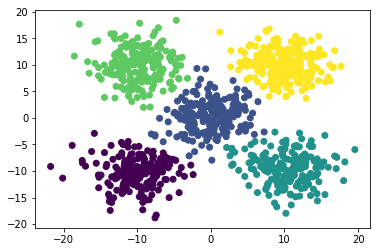

Spectral Clustering Results:
col_0    0    1    2    3    4
row_0                         
0        0    3    0    0  218
1        0    3    0  200    0
2      186    5    0    0    0
3        0    1  186    0    0
4        0  189    6    2    1


In [14]:
################# Spectral Clustering ######################

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering Results:')
print(pd.crosstab(y_train, predict))

In [15]:
################### AFFINITY PROPOGATION ######## 

af = AffinityPropagation().fit(X_train)
# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 23


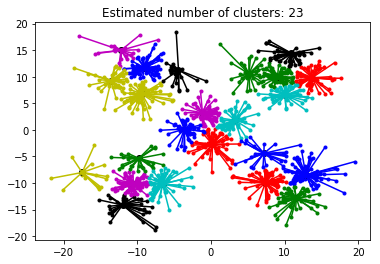

In [16]:

plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# First Example
- all models performed fairly well except for affinity clustering in this example

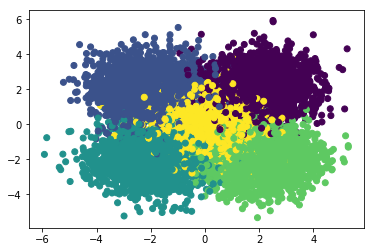

In [19]:
# Blob 2 - Close Together Low SD 
# Specify centers
centers = [[2, 2], [-2, 2], [-2, -2], [2, -2], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)

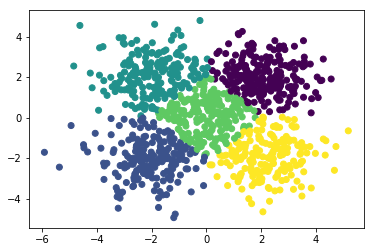

K-Means Results:
col_0    0    1    2    3    4
row_0                         
0      198    2    0    2   11
1        0    6  176    2   12
2        5  178    1    0   12
3       15   17   11   15  151
4        3    0    3  168   12


In [20]:
################## K-Means ###########################
from sklearn.cluster import KMeans

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means Results:')
print(pd.crosstab(Y_, y_train))

In [23]:
####################### Mean Shift ####################
# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  1


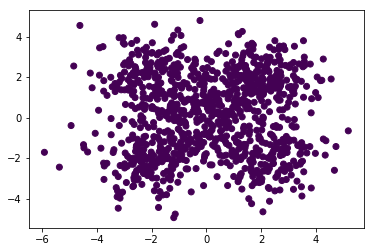

Mean Shift Results:
col_0    0    1    2    3    4
row_0                         
0      221  203  191  187  198


In [24]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift Results:')
print(pd.crosstab(labels, y_train))

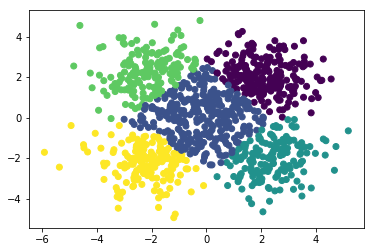

Spectral Clustering Results:
col_0    0    1    2    3    4
row_0                         
0      193   25    1    2    0
1        2   44    0  157    0
2        0   33    1    1  156
3        3   32  152    0    0
4        7  177    7    3    4


In [25]:
################# Spectral Clustering ######################

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering Results:')
print(pd.crosstab(y_train, predict))

In [26]:
################### AFFINITY PROPOGATION ###############

af = AffinityPropagation().fit(X_train)
# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 32


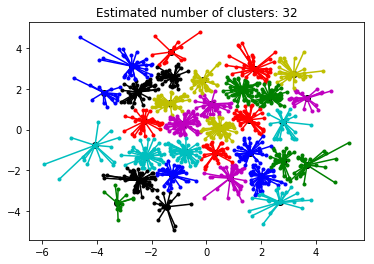

In [27]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

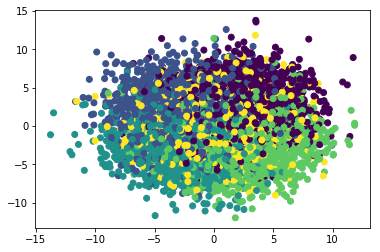

In [29]:
# Blob 3 Close together and high SD

# Specify centers
centers = [[2, 2], [-2, 2], [-2, -2], [2, -2], [0, 0]]

# Make 10,000 rows worth of data, 3 features representing 5 blobs, 
# each with standard deviation of 3.

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=3,
    n_features=2,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Split data (only function here to make training set smaller?)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42
)


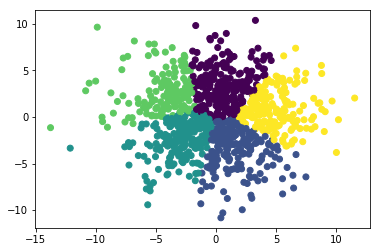

K-Means Results:
col_0    0   1   2   3   4
row_0                     
0      100  65  14  21  58
1       23  12  46  79  39
2        9  39  99  20  40
3       15  74  23   7  28
4       74  13   9  60  33


In [30]:
################## K-Means ###########################
from sklearn.cluster import KMeans

# Calculate predicted values
Y_ = KMeans(n_clusters=5, random_state=42).fit_predict(X_train)

# Plot solution
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_)
plt.show()

# Check solution 
print('K-Means Results:')
print(pd.crosstab(Y_, y_train))

In [31]:
####################### Mean Shift ####################
# Set the bandwidth estimator
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of cluster centers
cluster_centers = ms.cluster_centers_

# Count clusters
n_clusters_ = len(np.unique(labels))

print('Mean shift clusters: ', n_clusters_)

Mean shift clusters:  2


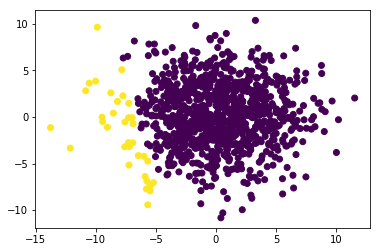

Mean Shift Results:
col_0    0    1    2    3    4
row_0                         
0      221  194  169  187  195
1        0    9   22    0    3


In [33]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

# Check solution 
print('Mean Shift Results:')
print(pd.crosstab(labels, y_train))

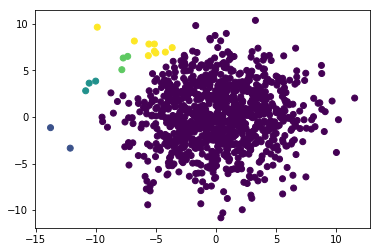

Spectral Clustering Results:
col_0    0  1  2  3  4
row_0                 
0      220  0  0  0  1
1      193  0  1  2  7
2      187  2  1  1  0
3      187  0  0  0  0
4      196  0  1  0  1


In [34]:
################# Spectral Clustering ######################

# Specify clusters
n_clusters=5

# Declare and fit model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predict clusters
predict=sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Spectral Clustering Results:')
print(pd.crosstab(y_train, predict))

In [35]:
################### AFFINITY PROPOGATION ###############

af = AffinityPropagation().fit(X_train)
# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Estimated number of clusters: 39


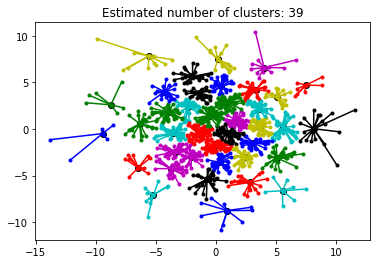

In [36]:
plt.figure()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Results Discussion
    -Kmeans performs well if you have some idea of how many clusters you have but accuracy decreases as the distance between the clusters decreases 
    -Mean Shift tends to oversimplify the data and works better with more distinct clusters
    -Spectral clustering performed simmilar to the Kmeans
    -Affinity Propogation identified way too many clusters in all scenarios